# Aggregate test set metrics for k trained models
This is applied to the evaluation outputs after training a classifier with k-fold cross-validation

In [16]:
import os
import json
import numpy as np
import pandas as pd

# For example, for the pre-trained SBERT-based regard classifier:
path = "../models/dev-majority_models-per-fold/majority_test"

## Read metrics per fold

In [17]:
jsons = []
confs = []
for d in os.listdir(path):
    if "eval_fold" in d:
        with open(os.path.join(path, d, "results_transformer_transformer.json"), "r") as f:
            jsons.append(json.load(f))
        confs.append(np.load(os.path.join(path, d, "conf_matrix.npy")))

## Aggregate for report

In [18]:
results_all = pd.DataFrame(jsons)
for col in results_all.columns:
    if col != "acc_per_class":
        results_all[col] = results_all[col].astype(float)

results_all.describe()


,mean_acc,mean_f1_macro,mean_f1_micro
count,5.000000,5.000000,5.000000
mean,0.776850,0.770917,0.767401
std,0.010168,0.011104,0.010969
min,0.759180,0.752242,0.748899
25%,0.778729,0.769560,0.766520
50%,0.779002,0.775365,0.770925
75%,0.783348,0.777894,0.775330
max,0.783990,0.779526,0.775330


In [19]:
avg_conf = np.array(confs).mean(axis=0).round(0)
avg_conf

array([[54.,  7.,  3.],
       [12., 62., 16.],
       [ 3., 11., 59.]], dtype=float32)

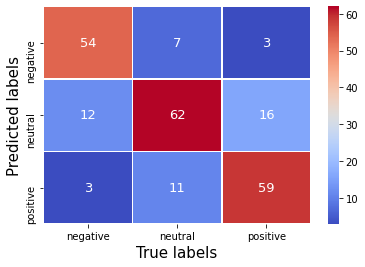

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["negative", "neutral", "positive"]
plot = sns.heatmap(avg_conf, cmap="coolwarm", annot=True, xticklabels=labels,
            yticklabels=labels, linewidths=.5, annot_kws={"fontsize":13})
plot.set_xlabel("True labels", fontsize=15)
plot.set_ylabel("Predicted labels", fontsize=15)
#plt.savefig(os.path.join(path, "avg_conf_maj_maj.jpg"))
plt.show()